<a href="https://colab.research.google.com/github/Savaliyaniks1/Pharmaceutical-Sales-prediction_Project_6-/blob/main/customer_purchasing_behaviour_task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 - Exploration of customer purchasing behaviour

In [ ]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sys,os
warnings.filterwarnings('ignore')

In [ ]:
## for showing all columns

pd.set_option("display.max_row",None)
pd.set_option("display.max_column",None)

In [ ]:
data = pd.read_csv(r'/content/clean_data_pharmaceutical.csv')
data.head()

,Unnamed: 0,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,DayofMonth,WeekofYear,Weekday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Competitionbeforestoreopened,PromoInterval0,PromoInterval1,PromoInterval2,PromoInterval3
0,0,1,5,2015-07-31,5263.0,555.0,1,1,0,1,2015,7,31,31,1,c,a,1270.0,9.0,2008.0,0.0,0.0,0.0,"0,0,0,0",0.0,0.0,0.0,0.0,0.0
1,1,2,5,2015-07-31,6064.0,625.0,1,1,0,1,2015,7,31,31,1,a,a,570.0,11.0,2007.0,1.0,13.0,2010.0,"Jan,Apr,Jul,Oct",0.0,1.0,4.0,7.0,10.0
2,2,3,5,2015-07-31,8314.0,821.0,1,1,0,1,2015,7,31,31,1,a,a,14130.0,12.0,2006.0,1.0,14.0,2011.0,"Jan,Apr,Jul,Oct",0.0,1.0,4.0,7.0,10.0
3,3,4,5,2015-07-31,13995.0,1485.0,1,1,0,1,2015,7,31,31,1,c,c,620.0,9.0,2009.0,0.0,0.0,0.0,"0,0,0,0",0.0,0.0,0.0,0.0,0.0
4,4,5,5,2015-07-31,4822.0,559.0,1,1,0,1,2015,7,31,31,1,a,a,16182.5,4.0,2015.0,0.0,0.0,0.0,"0,0,0,0",0.0,0.0,0.0,0.0,0.0


In [ ]:
# remove unnamed:0 column

data = data.drop('Unnamed: 0', axis=1)


# Univariate Analysis

# Non-Graphical Univariate Analysis

In [ ]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Store,491574.0,558.581581,321.919840,1.0,281.0,558.0,838.0,1115.0
DayOfWeek,491574.0,4.003367,1.997261,1.0,2.0,4.0,6.0,7.0
Sales,491574.0,5800.071907,3662.473492,0.0,3809.0,5898.0,8040.0,14049.5
Customers,491574.0,613.907473,390.608780,0.0,410.0,616.0,842.0,1485.0
Open,491574.0,0.825518,0.379524,0.0,1.0,1.0,1.0,1.0
Promo,491574.0,0.396103,0.489087,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,491574.0,0.190392,0.392611,0.0,0.0,0.0,0.0,1.0
Year,491574.0,2014.480864,0.499634,2014.0,2014.0,2014.0,2015.0,2015.0
Month,491574.0,6.138457,3.048781,1.0,4.0,6.0,8.0,12.0
DayofMonth,491574.0,15.982808,8.803706,1.0,8.0,16.0,24.0,31.0


# Store Type

In [ ]:
count_df = data['StoreType'].value_counts()
count_df

,count
StoreType,
a,267829
d,148866
c,67063
b,7816


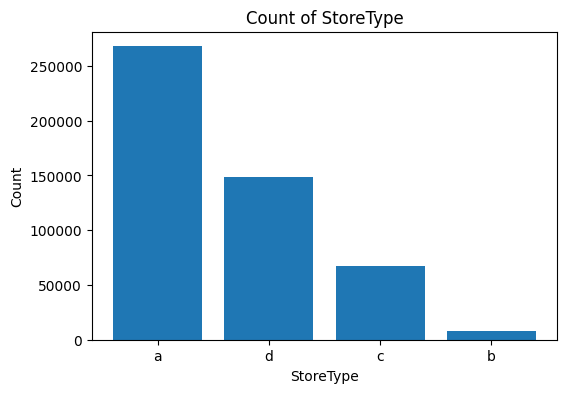

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(count_df.index, count_df.values)
plt.xlabel('StoreType')
plt.ylabel('Count')
plt.title('Count of StoreType')
plt.show()

Store Type "a" has the highest count, significantly outnumbering the other store types.

Store Type "d" has the second-highest count, followed by Store Type "c".

Store Type "b" has the lowest count, with a relatively small number of occurrences.

# Assortment

In [ ]:
count_df = data['Assortment'].value_counts()
count_df

,count
Assortment,
a,257887
c,229637
b,4050


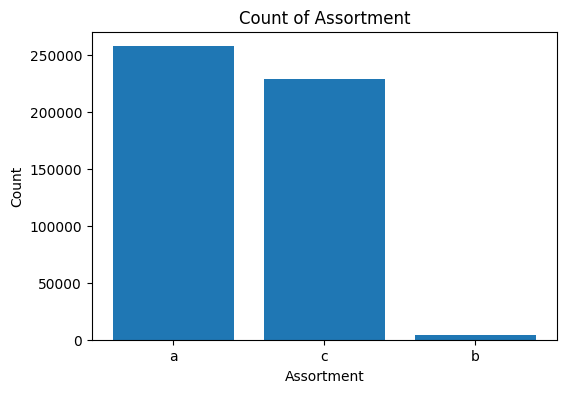

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(count_df.index, count_df.values)
plt.xlabel('Assortment')
plt.ylabel('Count')
plt.title('Count of Assortment')
plt.show()

The chart indicates that Assortment Type "a" is the most prevalent among the three assortment types represented.

Assortment Type "c" has a moderate count, while Assortment Type "b" is less common.

# Competition Distance

In [ ]:
count_df = data['CompetitionDistance'].value_counts().head(10)
count_df

,count
CompetitionDistance,
16182.5,48999
250.0,5466
350.0,3767
50.0,3766
190.0,3579
180.0,3293
90.0,3291
1200.0,3132
330.0,3110


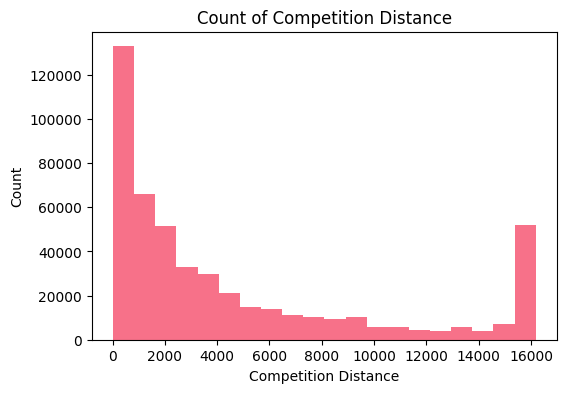

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(data['CompetitionDistance'], bins=20, color = sns.color_palette("husl", 1)[0]) # Get the first color from the palette
plt.xlabel('Competition Distance')
plt.ylabel('Count')
plt.title('Count of Competition Distance')
plt.show()


The histogram indicates that competition distance is concentrated in the lower range and spreads out towards higher distances, with a small cluster around 15,000 meters. This suggests that most stores face competition from nearby stores, while a smaller number of stores have competitors located farther away.

# Promo2

In [ ]:
count_df = data['Promo2'].value_counts()
count_df

,count
Promo2,
0.0,251579
1.0,239994


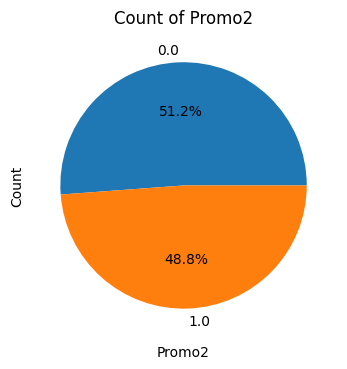

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(count_df, labels=count_df.index, autopct='%1.1f%%')
plt.xlabel('Promo2')
plt.ylabel('Count')
plt.title('Count of Promo2')
plt.show()

The pie chart indicates that Promo2 is roughly equally distributed between the two categories, with a slight majority of observations belonging to Category 1.

# Competition Before Store Opened

In [ ]:
count_df = data['Competitionbeforestoreopened'].value_counts()
count_df

,count
Competitionbeforestoreopened,
0.0,335109
1.0,156464


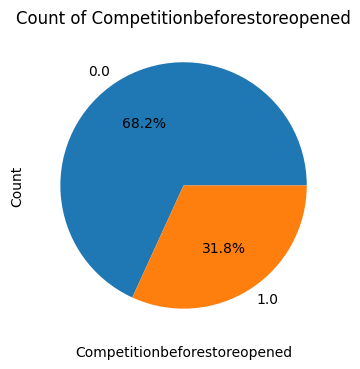

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(count_df, labels=count_df.index, autopct='%1.1f%%')
plt.xlabel('Competitionbeforestoreopened')
plt.ylabel('Count')
plt.title('Count of Competitionbeforestoreopened')
plt.show()

competition after store 68.2% of the total count.

competition before store opening 31.8% of the total count.

# Day Of Week

In [ ]:
count_df = data['DayOfWeek'].value_counts()
count_df

,count
DayOfWeek,
5,71140
4,70669
1,70025
7,70025
6,70025
3,69845
2,69845


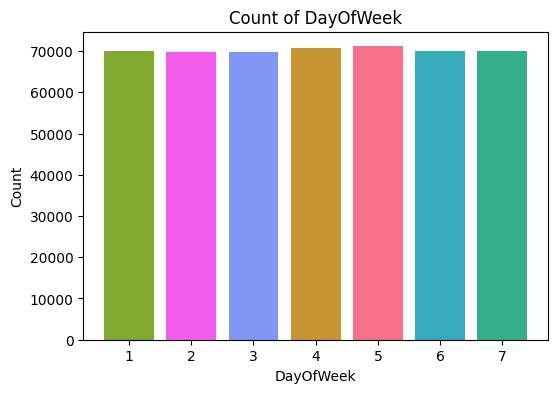

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(count_df.index, count_df.values, color = sns.color_palette("husl", 7))
plt.xlabel('DayOfWeek')
plt.ylabel('Count')
plt.title('Count of DayOfWeek')
plt.show()

The customer counts for each day of the week are relatively similar, indicating a fairly uniform distribution of observations across the days.

Day 1 has the highest customer count, while Day 6 has the lowest customer count. However, the differences between the customer counts are minimal.

# Sales

In [ ]:
count_df = data['Sales'].value_counts().head(10)
count_df

,count
Sales,
0.0,85796
14049.5,13629
5674.0,113
5665.0,101
6376.0,100
5818.0,99
6107.0,99
6171.0,99
5960.0,98


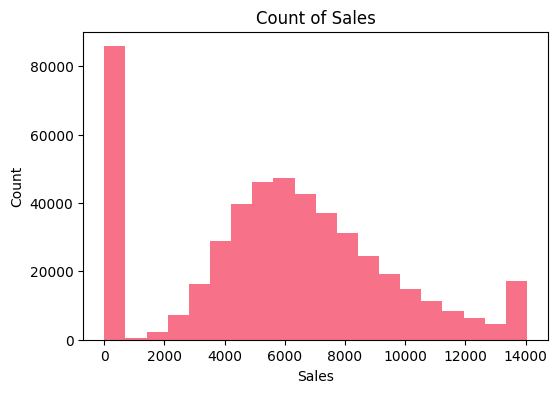

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(data['Sales'], bins=20, color = sns.color_palette("husl", 1)[0]) # Get the first color from the palette
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Count of Sales')
plt.show()

The histogram indicates that sales are concentrated in the lower range and spread out towards higher sales, with a small cluster around 13,000 sales.

This suggests that most stores have a relatively low number of sales, while a smaller number of stores achieve significantly higher sales volumes.

# Customers

In [ ]:
count_df = data['Customers'].value_counts().head(10)
count_df

,count
Customers,
0.0,85795
1485.0,18498
603.0,1168
560.0,1157
576.0,1151
571.0,1139
587.0,1133
625.0,1128
550.0,1128


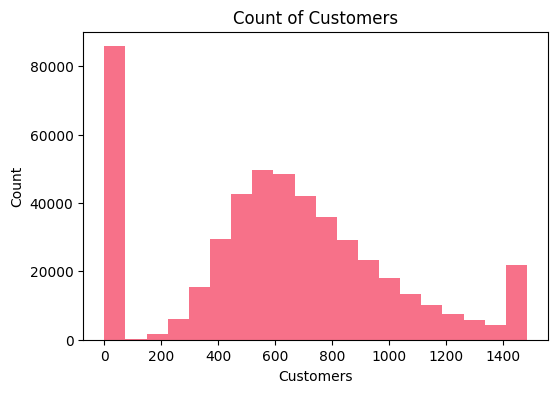

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(data['Customers'], bins=20, color = sns.color_palette("husl", 1)[0]) # Get the first color from the palette
plt.xlabel('Customers')
plt.ylabel('Count')
plt.title('Count of Customers')
plt.show()

The histogram indicates that customer counts are concentrated in the lower range and spread out towards higher customer counts, with a small cluster around 1300 customers.

This suggests that most stores have a relatively low number of customers, while a smaller number of stores attract significantly higher customer traffic.

# Open

In [ ]:
count_df = data['Open'].value_counts()
count_df

,count
Open,
1,405803
0,85771


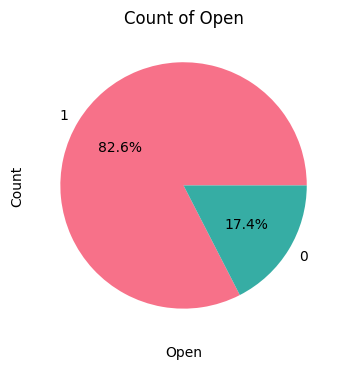

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(count_df, labels=count_df.index, autopct='%1.1f%%',colors = sns.color_palette("husl", 2))
plt.xlabel('Open')
plt.ylabel('Count')
plt.title('Count of Open')
plt.show()

The pie chart indicates that Category 1 is significantly more prevalent than Category 0 in the Open variable. This suggests that a large majority of the observations in the data belong to Category 1.

# Promo

In [ ]:
count_df = data['Promo'].value_counts()
count_df

,count
Promo,
0,296860
1,194714


Text(0.5, 1.0, 'Count of Promo')

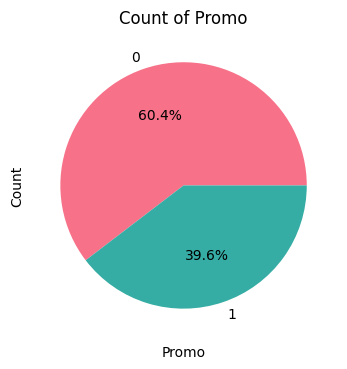

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(count_df, labels=count_df.index, autopct='%1.1f%%',colors = sns.color_palette("husl", 2))
plt.xlabel('Promo')
plt.ylabel('Count')
plt.title('Count of Promo')

The chart you provided is a pie chart showing the distribution of Promo.

# State Holiday

In [ ]:
data['StateHoliday'] = data['StateHoliday'].replace(0, '0')
count_df = data['StateHoliday'].value_counts()
count_df

,count
StateHoliday,
0,474058
a,11186
b,4460
c,1870


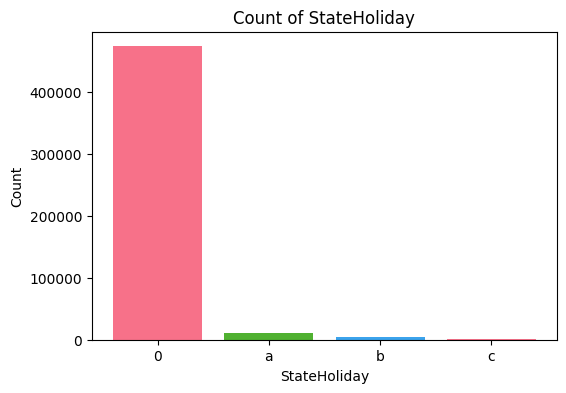

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(count_df.index.astype(str), count_df.values, color = sns.color_palette("husl", 3))
plt.xlabel('StateHoliday')
plt.ylabel('Count')
plt.title('Count of StateHoliday')
plt.show()

The chart indicates that StateHoliday category "0" is the most prevalent among the four categories represented. StateHoliday categories "a" and "b" have moderate counts, while StateHoliday category "c" is less common.

# School Holiday

In [ ]:
count_df = data['SchoolHoliday'].value_counts()
count_df

,count
SchoolHoliday,
0,397982
1,93592


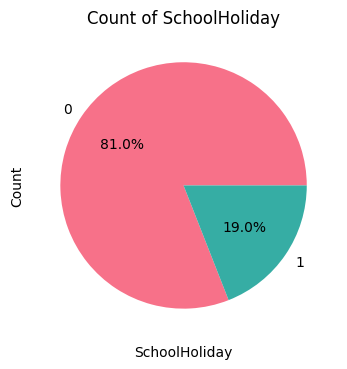

In [ ]:
plt.figure(figsize=(6,4))
plt.pie(count_df, labels=count_df.index, autopct='%1.1f%%',colors = sns.color_palette("husl", 2))
plt.xlabel('SchoolHoliday')
plt.ylabel('Count')
plt.title('Count of SchoolHoliday')
plt.show()

# Bivariate Analysis

# State Holiday and Sales

In [ ]:
count_df = data.groupby('StateHoliday')['Sales'].sum()
count_df

,Sales
StateHoliday,
0,2.846687e+09
a,3.324906e+06
b,8.309675e+05
c,3.218230e+05


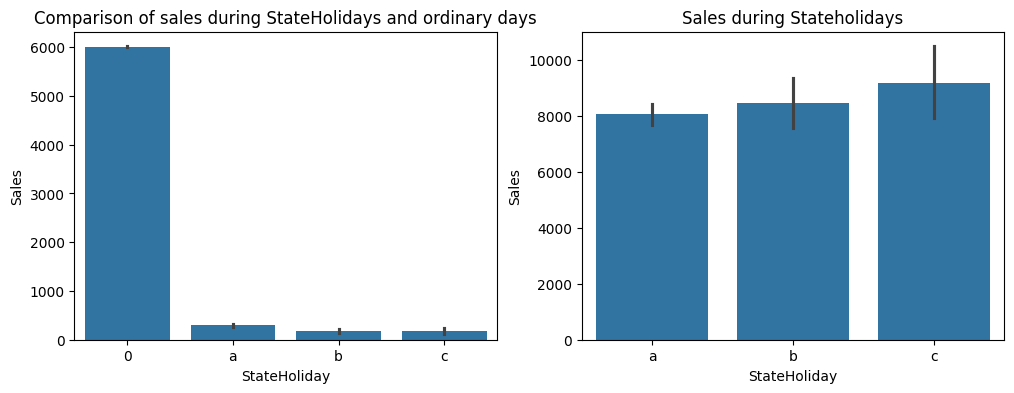

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))

# holidays and no_holidays
sns.barplot(x='StateHoliday', y='Sales', data=data, ax=axis1).set_title('Comparison of sales during StateHolidays and ordinary days')

# holidays only
mask = (data["StateHoliday"] != "0") & (data["Sales"] > 0)
sns.barplot(x='StateHoliday', y='Sales', data=data[mask], ax=axis2).set_title('Sales during Stateholidays')
plt.show()

Both charts suggest that sales are generally higher during StateHolidays compared to ordinary days. However, the specific impact of StateHolidays varies by category.



# School Holiday vs sales and Customers

In [ ]:
count_df = data.groupby('SchoolHoliday')['Sales'].sum()
count_df

,Sales
SchoolHoliday,
0,2.243542e+09
1,6.076225e+08


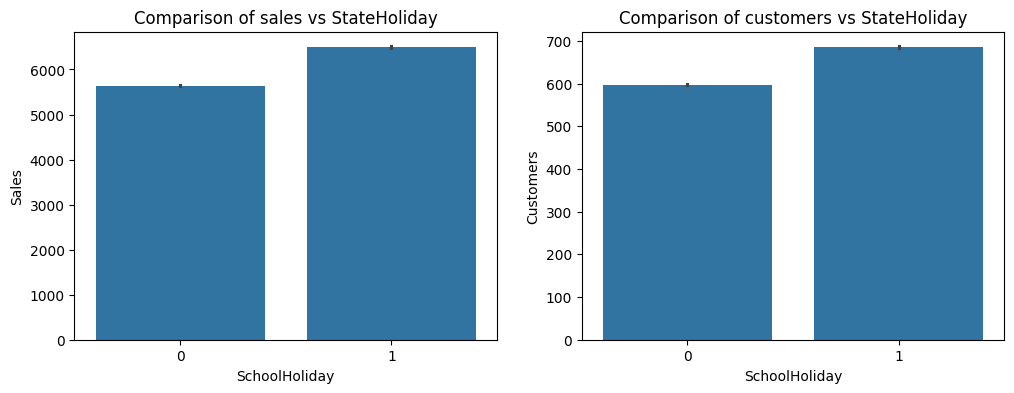

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(12,4))


sns.barplot(x='SchoolHoliday', y='Sales', data=data, ax=axis1).set_title('Comparison of sales vs StateHoliday')
sns.color_palette("husl", 2)
mask = (data["SchoolHoliday"] != 0) & (data["Sales"] > 0)
sns.barplot(x='SchoolHoliday', y='Customers', data=data, ax=axis2).set_title('Comparison of customers vs StateHoliday')
sns.color_palette("husl", 2)
plt.show()

Both charts suggest that StateHolidays have a positive impact on both sales and customer traffic.

 However, the increase in sales and customers is relatively small, indicating that the effect of StateHolidays on the business may be limited.

  It's possible that other factors, such as promotions or marketing efforts, may have a more significant impact on sales and customer numbers.

# StoreType vs Sales and Customers

In [ ]:
count_df = data.groupby('StoreType')['Sales'].sum()
count_df

,Sales
StoreType,
a,1.528419e+09
b,7.611671e+07
c,3.870360e+08
d,8.595930e+08


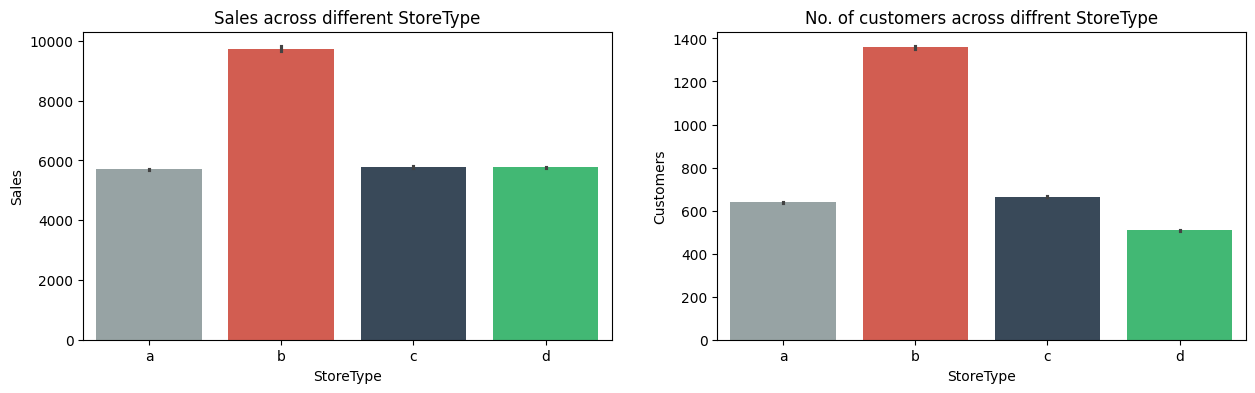

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='StoreType', y='Sales', data=data, ax=axis1, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('Sales across different StoreType')
sns.barplot(x='StoreType', y='Customers', data=data, ax=axis2, palette = ["#95a5a6", "#e74c3c", "#34495e", "#2ecc71"], order=['a','b','c', 'd']).set_title('No. of customers across diffrent StoreType')
plt.show()

Both charts suggest that StoreType "b" is the most successful in terms of both sales and customer attraction.

It generates the highest average sales and attracts the most customers. StoreTypes "a", "c", and "d" have varying levels of performance, with StoreTypes "c" and "d" showing similar results in terms of sales and customer numbers.

# Assortment vs Sales and Customers

In [ ]:
count_df = data.groupby('Assortment')['Sales'].sum()
count_df

,Sales
Assortment,
a,1.407854e+09
b,3.713035e+07
c,1.406180e+09


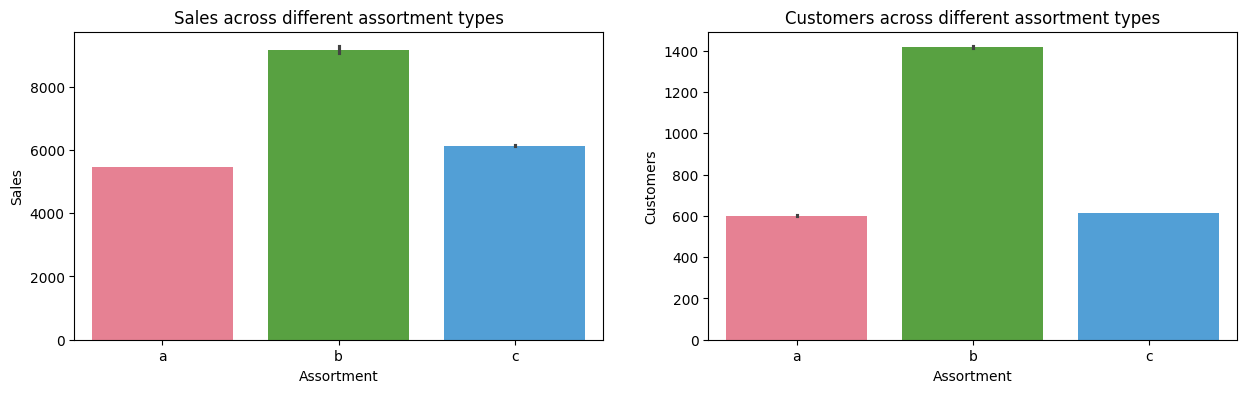

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Assortment', y='Sales', data=data, palette = 'husl', order=['a','b','c'], ax=axis1).set_title('Sales across different assortment types')
sns.barplot(x='Assortment', y='Customers', data=data, palette = 'husl', order=['a','b','c'], ax=axis2).set_title('Customers across different assortment types')
plt.show()

# Day Of Week vs Sales and Customers

In [ ]:
count_df = data.groupby('DayOfWeek')['Sales'].sum()
count_df

,Sales
DayOfWeek,
1,537245073.0
2,502195156.5
3,474352920.5
4,439527263.5
5,470668206.5
6,413080258.5
7,14095669.0


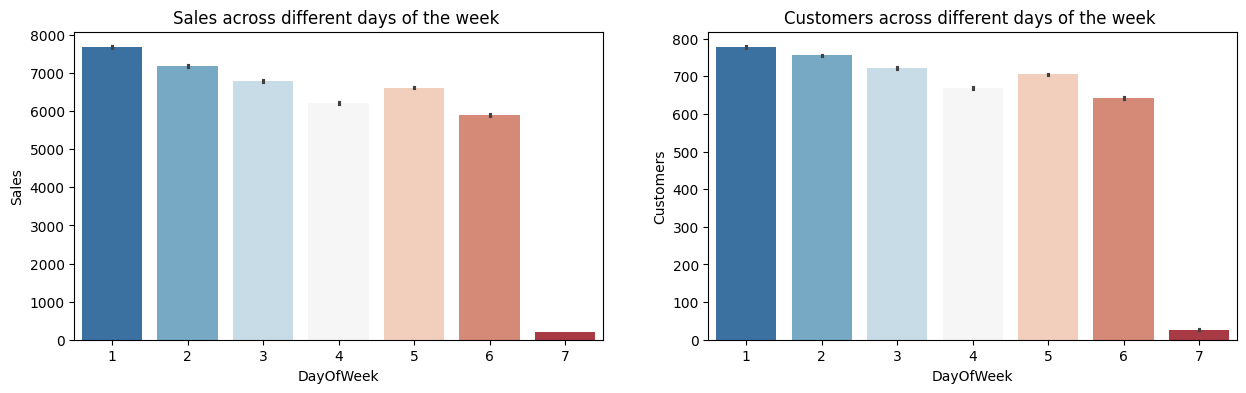

In [ ]:
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
sns.barplot(x='DayOfWeek', y='Sales', data=data, palette = 'RdBu_r', ax=axis1).set_title('Sales across different days of the week ')
sns.barplot(x='DayOfWeek', y='Customers', data=data, palette = 'RdBu_r', ax=axis2).set_title('Customers across different days of the week ')
plt.show()

Both charts suggest that there is no strong correlation between the day of the week and sales or customer numbers. While there are minor fluctuations, the overall trend indicates that sales and customer traffic are relatively consistent across different days of the week.

This might suggest that other factors, such as promotions, holidays, or seasonal trends, have a more significant impact on sales and customer behavior.

# Promo vs Sales and Customers

In [ ]:
count_df = data.groupby('Promo')['Sales'].sum()

count_df

,Sales
Promo,
0,1.311129e+09
1,1.540035e+09


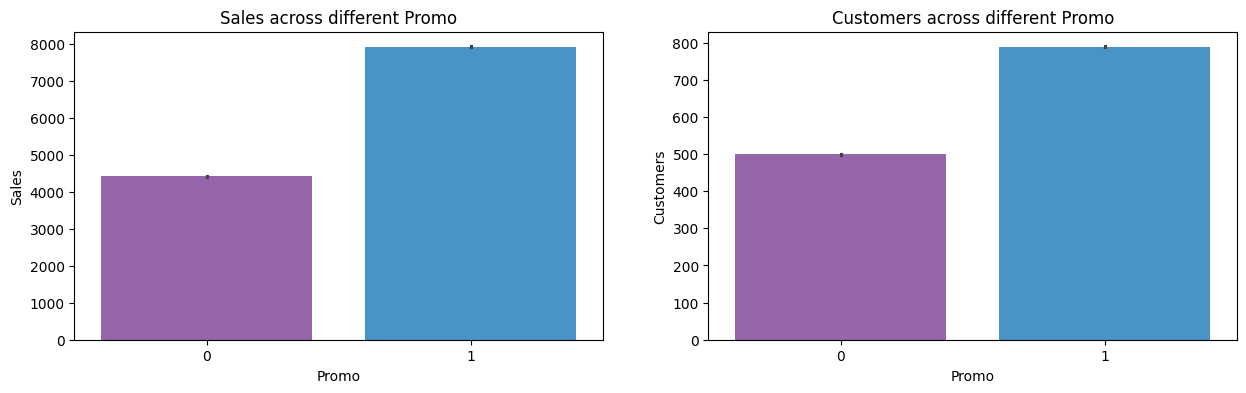

In [ ]:
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo', y='Sales', data=data, palette = flatui, ax=axis1).set_title('Sales across different Promo')
sns.barplot(x='Promo', y='Customers', data=data, ax=axis2,  palette = flatui).set_title('Customers across different Promo')
plt.show()

Both charts suggest that promotions have a positive impact on both sales and customer traffic. However, the increase in sales and customers is relatively small, indicating that the effect of promotions may be limited.

It's possible that other factors, such as product offerings, pricing, or marketing strategies, may have a more significant impact on sales and customer behavior.

# Promo2 vs Sales and Customers

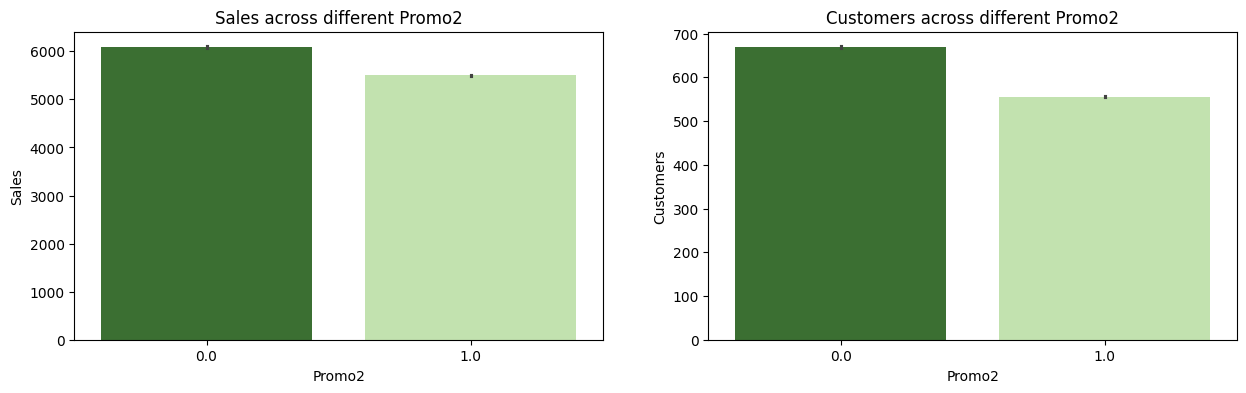

In [ ]:
flatui = [ "#347928", "#C0EBA6"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

sns.barplot(x='Promo2', y='Sales', data=data, ax=axis1, palette = flatui).set_title('Sales across different Promo2')
sns.barplot(x='Promo2', y='Customers', data=data, ax=axis2, palette = flatui).set_title('Customers across different Promo2')
plt.show()

Both charts suggest that Promo2 level 0 is slightly more effective in driving sales and attracting customers than Promo2 level 1. However, the differences are relatively small, indicating that the impact of Promo2 may be limited.

It's possible that other factors, such as the specific nature of the promotions or the timing of their implementation, may have a more significant influence on sales and customer behavior.

# PromoInterval vs Sales and Customers

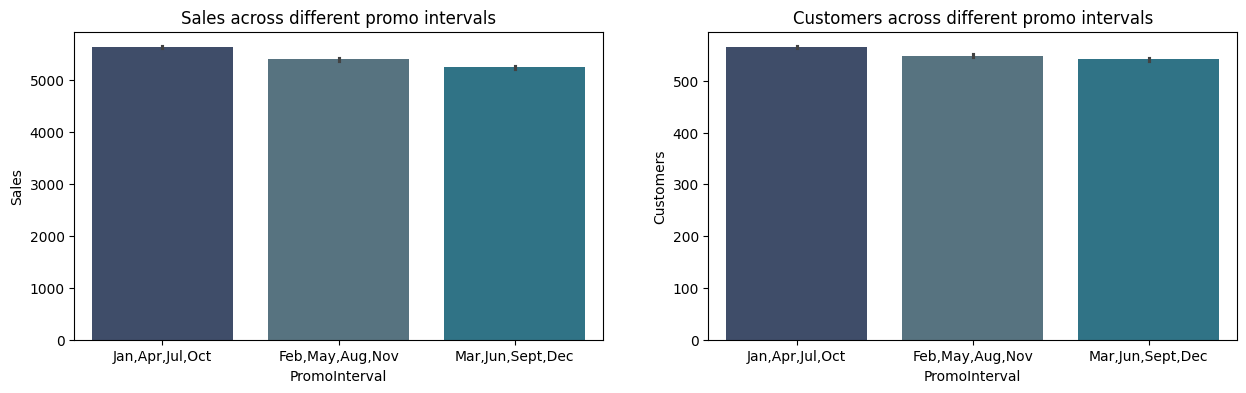

In [ ]:
flatui = ["#384B70", "#507687", "#227B94", "#227B94", "#34495e", "#2ecc71"]
fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))

# values with promo2 only
mask = (data["Promo2"] != 0)

sns.barplot(x='PromoInterval', y='Sales', data=data[mask], ax=axis1, palette = flatui).set_title('Sales across different promo intervals')
sns.barplot(x='PromoInterval', y='Customers', data=data[mask], ax=axis2, palette = flatui).set_title('Customers across different promo intervals')
plt.show()

The overall trend indicates that the choice of promo interval does not significantly affect the effectiveness of promotions in driving sales and attracting customers. This might suggest that other factors, such as the specific nature of the promotions, the timing of their implementation, or the overall market conditions, may have a more significant influence on sales and customer behavior.


# Open and DayOfWeek



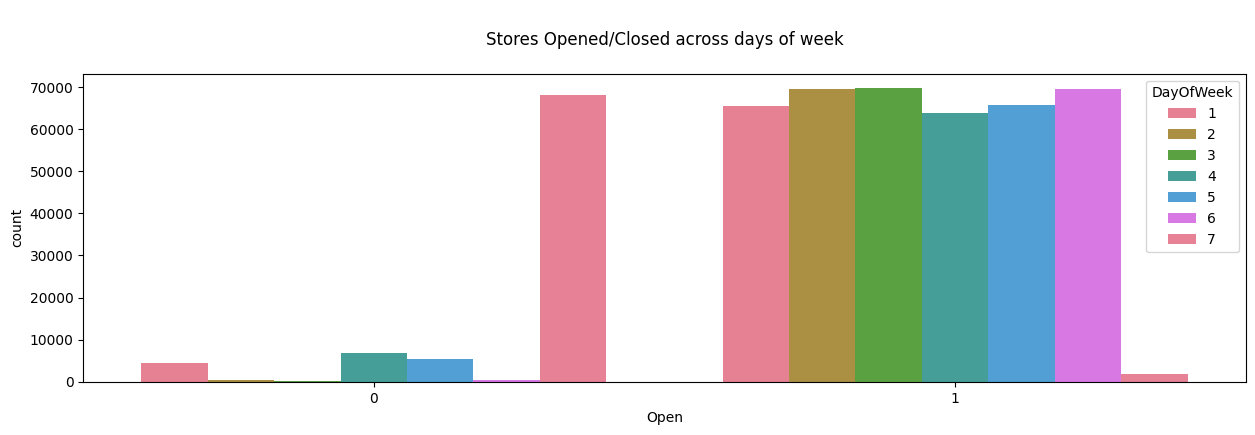

In [ ]:
fig, (axis1) = plt.subplots(1,1,figsize=(15,4))
sns.countplot(x='Open',hue='DayOfWeek', data=data,palette="husl", ax=axis1).set_title('\nStores Opened/Closed across days of week\n')
plt.show()

stores are generally open throughout the week with minimal closures. However, there is a slight tendency for fewer stores to be open on Mondays and Sundays. This could be attributed to factors such as weekend closures, reduced business hours, or other operational considerations.

# Sales and Month

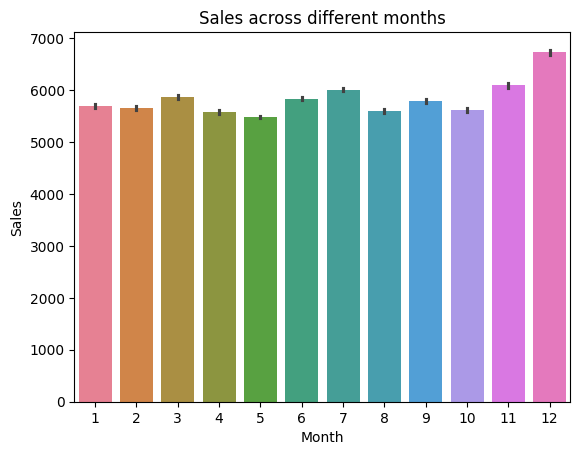

In [ ]:
sns.barplot(x='Month', y='Sales', data=data,palette="husl").set_title('Sales across different months')
plt.show()

The chart indicates that while there are some fluctuations in sales across different months, there is no strong seasonal pattern evident in the data.

The majority of months exhibit similar sales performance, with Month 12 and Month 6 showing slightly higher sales compared to the other months.

# Competition Distance and Sales

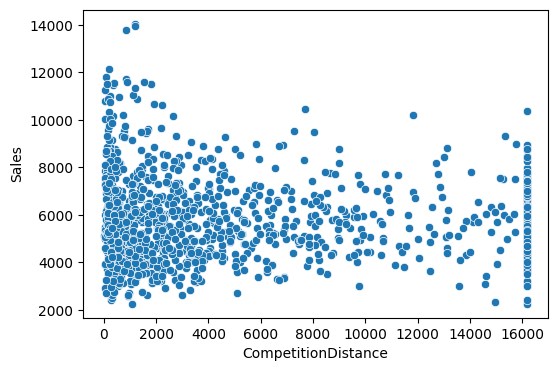

In [ ]:
a = data.groupby('Store').agg({
    'CompetitionDistance': 'mean',
    'Sales': 'mean',
    'Customers': 'mean'
})
plt.subplots(figsize = (6, 4))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=a)
plt.show()

there is a slight negative relationship between Competition Distance and Sales, the relationship is not very strong and is influenced by other factors.

The presence of clusters and outliers suggests that the relationship may be more complex than a simple linear correlation.

# Correlation Analysis

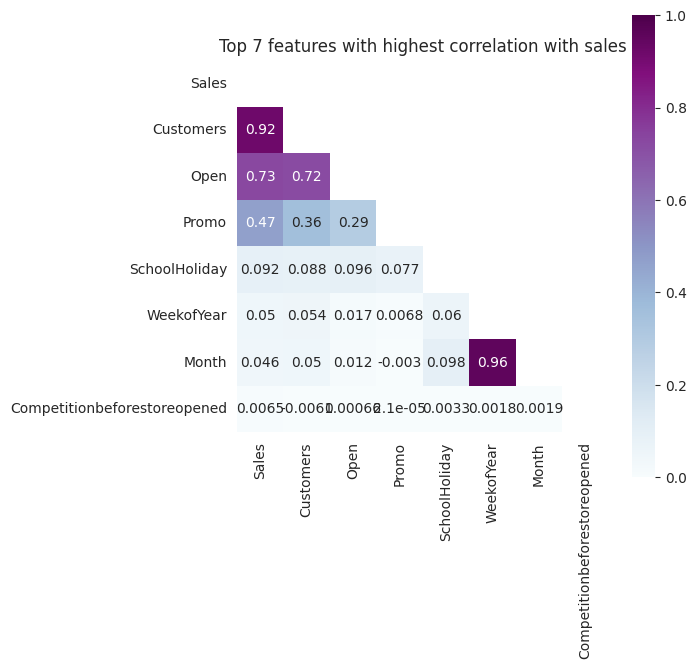

In [ ]:
f_most_correlated = data.corr(numeric_only=True).nlargest(8,'Sales')['Sales'].index
f_correlation = data[f_most_correlated].corr()

# Generate a mask for the upper triangle
f_mask = np.zeros_like(f_correlation)
f_mask[np.triu_indices_from(f_mask)] = True
with sns.axes_style("white"):
    f_fig, f_ax = plt.subplots(figsize=(6, 6))
    f_ax = sns.heatmap(f_correlation, mask=f_mask, vmin=0, vmax=1, square=True,
                        annot=True, annot_kws={"size": 10}, cmap="BuPu")
plt.title('Top 7 features with highest correlation with sales')
plt.show()

The correlation matrix highlights that Customers and Open are the most important features in predicting Sales. Promotions have a moderate positive impact, while other features such as SchoolHoliday, WeekofYear, Month, and DayofMonth have minimal or inconsistent effects on Sales.

# Filtering Data and Answering.

## Distribution of promotion in the training and test datasets


In [ ]:
# load test data

test_data = pd.read_csv(r'/content/test.csv')

In [ ]:
test_data.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


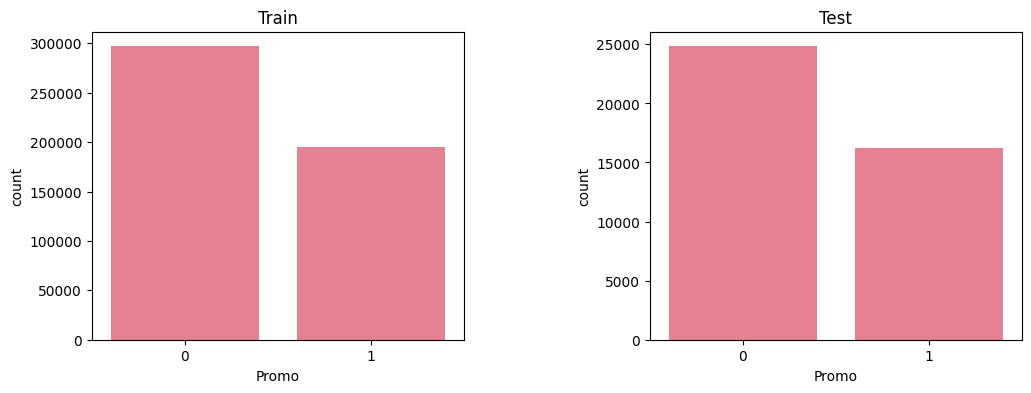

In [ ]:
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(12, 4))
ax[0].set_title("Train")
sns.countplot(x='Promo', data=data, ax=ax[0],color = sns.color_palette("husl", 1)[0])
ax[1].set_title("Test")
sns.countplot(x='Promo', data=test_data, ax=ax[1],color = sns.color_palette("husl",1)[0])
fig.subplots_adjust(wspace=0.5)
fig.show()

### The distribution of promotion is almost the same in both datasets.

# Monthly sales trend per store type

In [ ]:
store_type_a = data[data.StoreType == 'a']
store_type_b = data[data.StoreType == 'b']
store_type_c = data[data.StoreType == 'c']
store_type_d = data[data.StoreType == 'd']

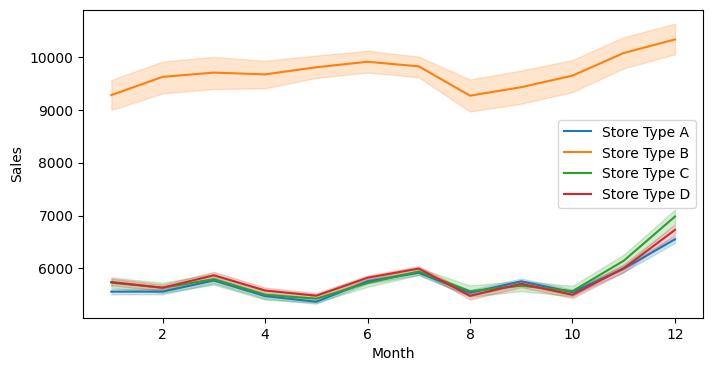

In [ ]:
plt.subplots(figsize = (8, 4))
sns.lineplot(x = store_type_a.Month, y = store_type_a.Sales, label="Store Type A")
sns.lineplot(x = store_type_b.Month, y = store_type_b.Sales, label="Store Type B")
sns.lineplot(x = store_type_c.Month, y = store_type_c.Sales, label="Store Type C")
sns.lineplot(x = store_type_d.Month, y = store_type_d.Sales, label="Store Type D")
plt.show()

The chart indicates that Store Type A consistently outperforms the other StoreTypes in terms of sales. Store Type B also shows strong performance, while Store Type C maintains a relatively stable level of sales. Store Type D exhibits the lowest sales performance but shows a gradual improvement throughout the year.

# Monthly sales per StoreType and Promo

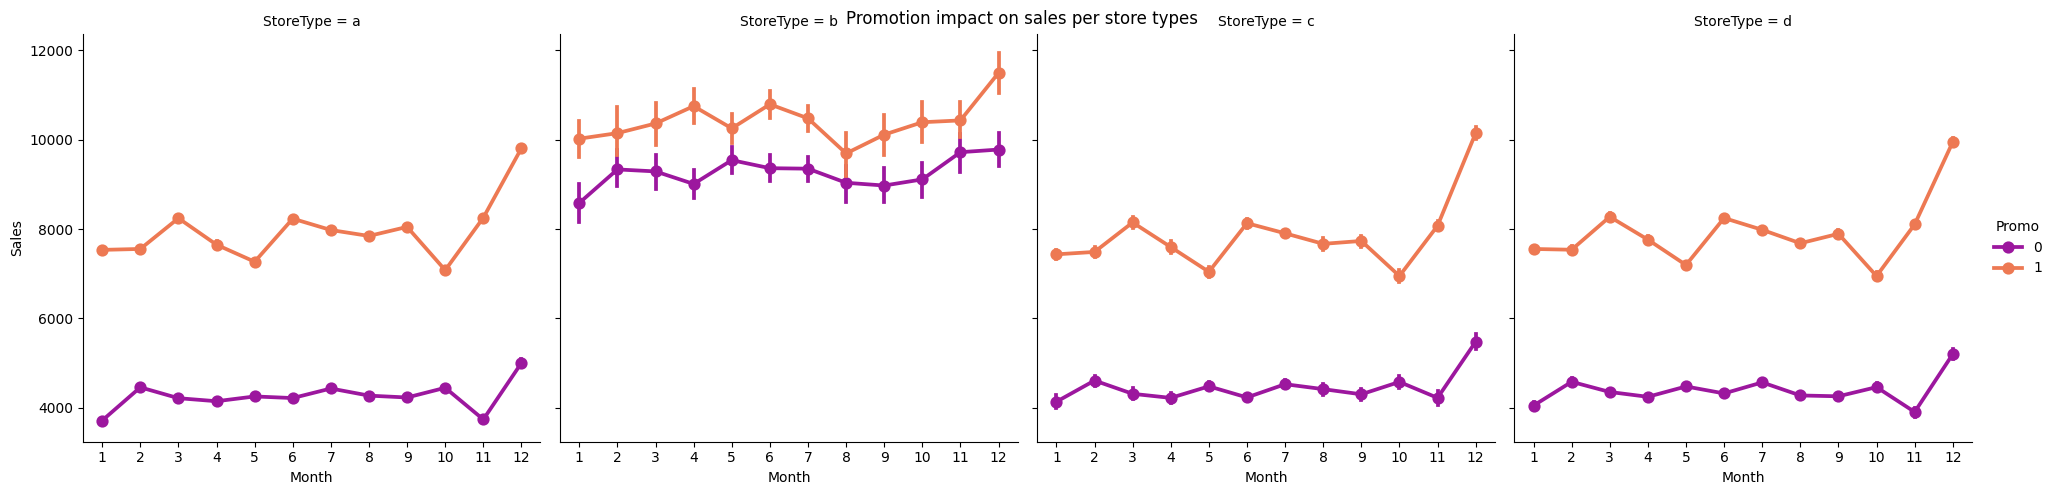

In [ ]:
g = sns.catplot(data = data, x = 'Month', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               kind='point')
g.fig.suptitle('Promotion impact on sales per store types') # Set title for the entire figure
plt.show()


# Monthly customers per StoreType and Promo

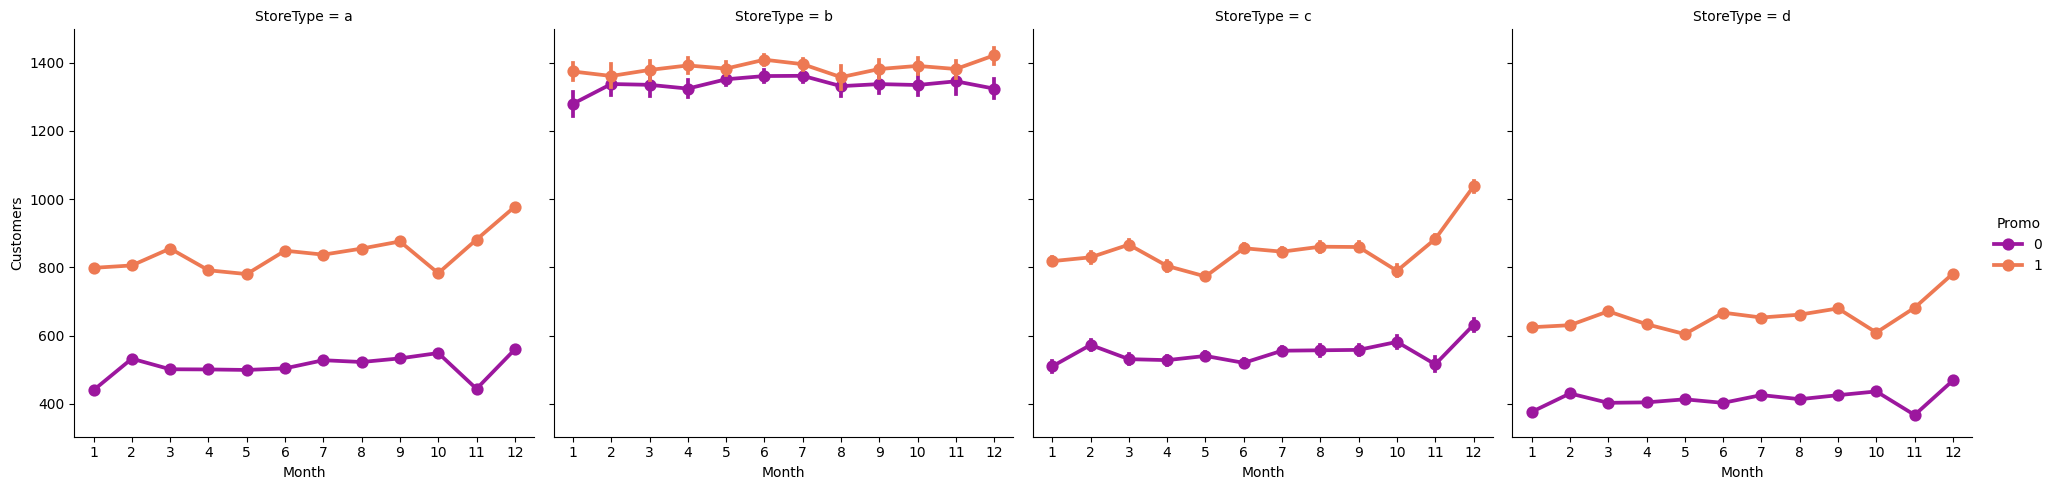

In [ ]:
sns.catplot(data = data, x = 'Month', y = "Customers",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c', 'd'],
               kind='point')
plt.show()

# Monthly sales per Assortment and Promo

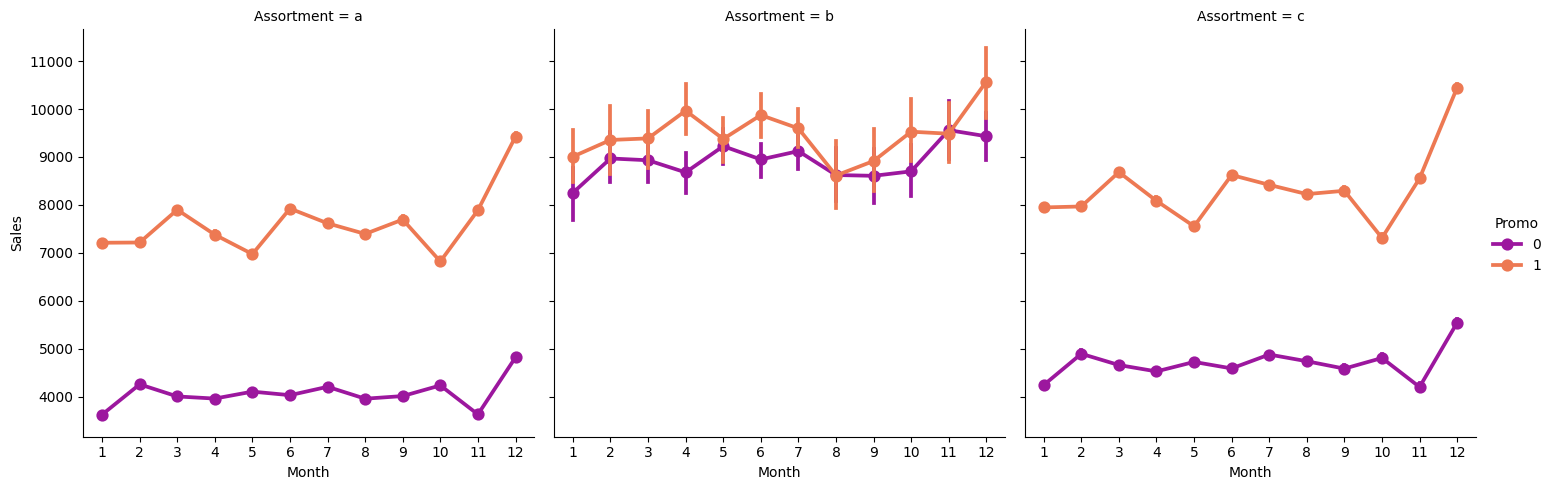

In [ ]:
sns.catplot(data = data, x = 'Month', y = "Sales",
               col = 'Assortment', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c'],
               kind='point')

plt.show()

# Monthly customers per Assortment and Promo

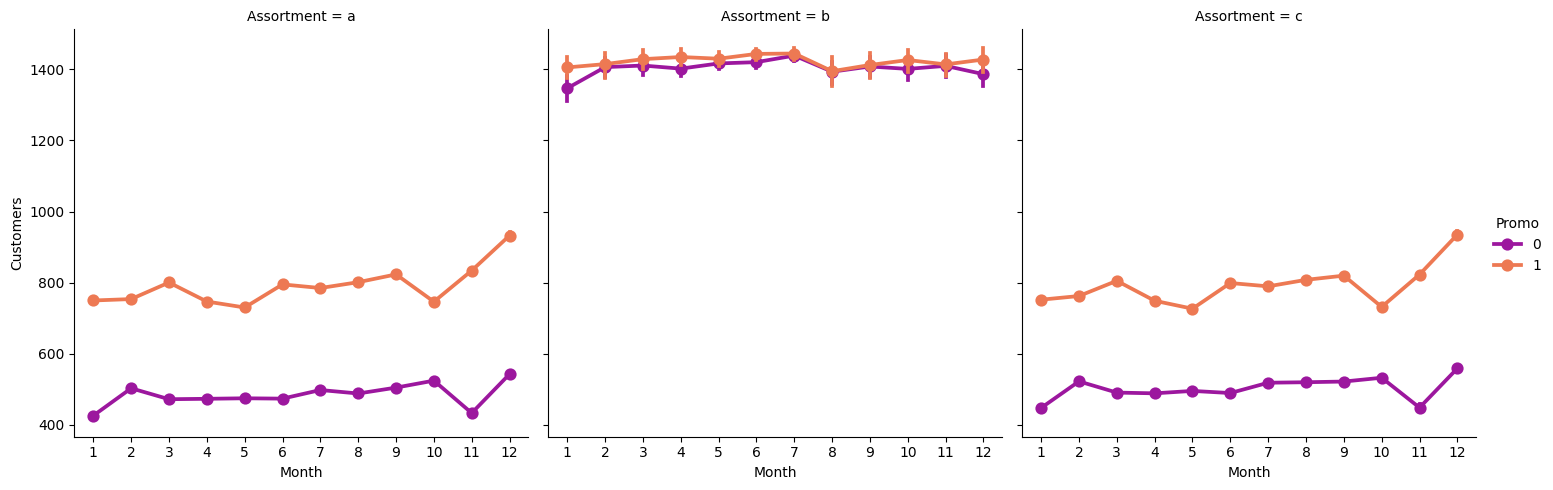

In [ ]:
sns.catplot(data = data, x = 'Month', y = "Customers",
               col = 'Assortment', # per store type in cols
               palette = 'plasma',
               hue = 'Promo',
               col_order=['a','b','c'],
               kind='point')
plt.show()

# Sales of stores open per DayOfWeek and StoreType

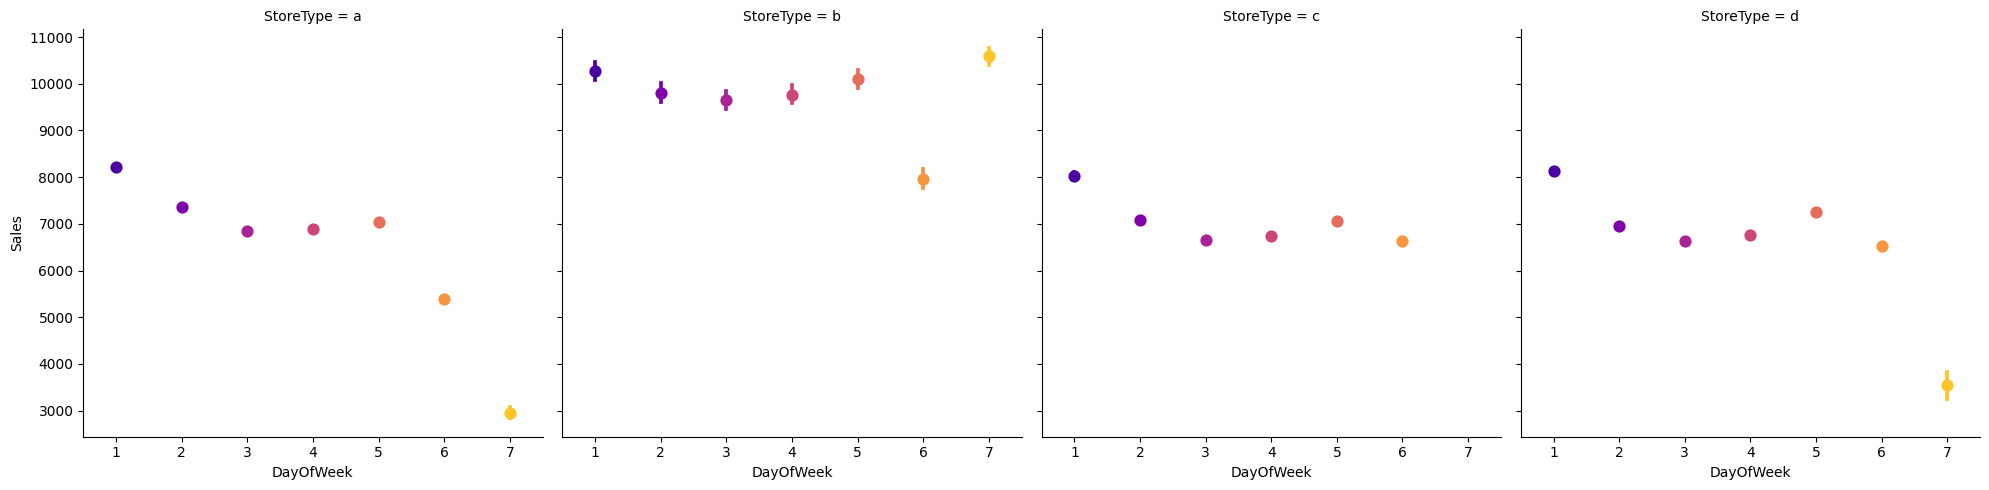

In [ ]:
# stores that are open only
mask = (data["Open"] != 0)

sns.catplot(data = data[mask], x = 'DayOfWeek', y = "Sales",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               col_order=['a','b','c', 'd'],
               kind='point')
plt.show()

# Customers of stores open per DayOfWeek and StoreType

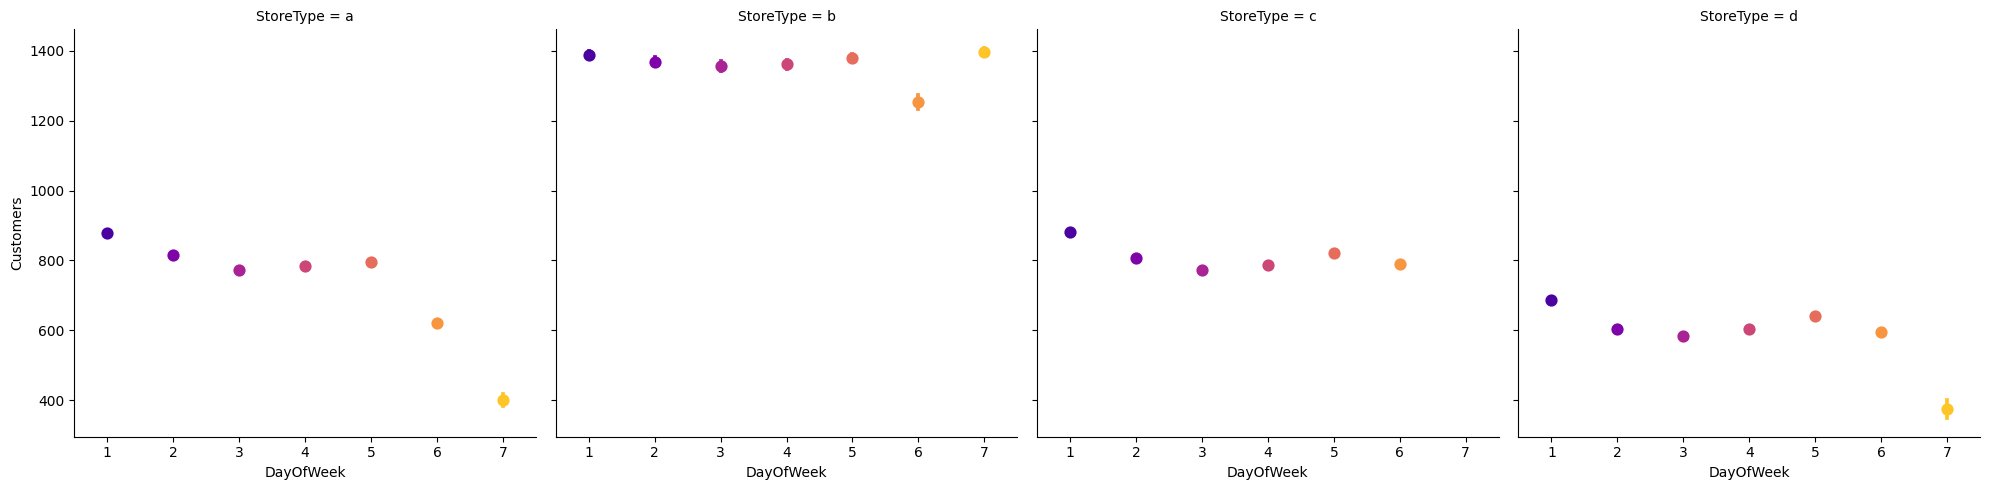

In [ ]:
# stores that are open only
mask = (data["Open"] != 0)

sns.catplot(data = data[mask], x = 'DayOfWeek', y = "Customers",
               col = 'StoreType', # per store type in cols
               palette = 'plasma',
               col_order=['a','b','c', 'd'],
               kind='point')
plt.show()

# Sales of stores open per DayOfWeek and Assortment

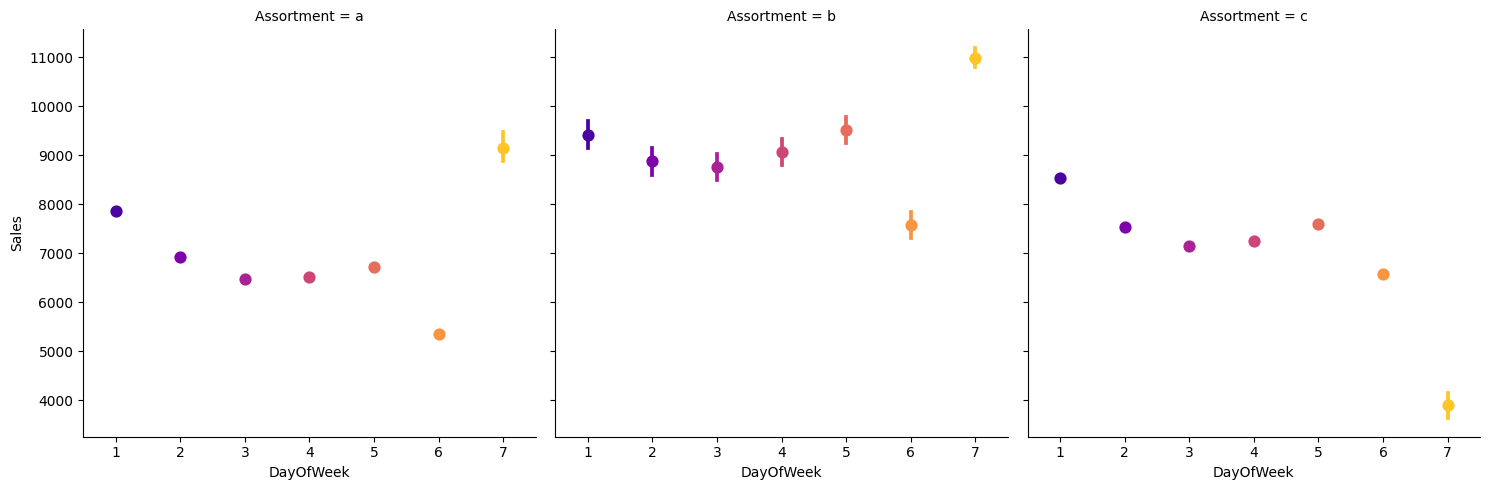

In [ ]:
# stores that are open only
mask = (data["Open"] != 0)

sns.catplot(data = data[mask], x = 'DayOfWeek', y = "Sales",
               col = 'Assortment', # per store type in cols
               palette = 'plasma',
               col_order=['a','b','c'],
               kind='point')
plt.show()

# Sales before, after and during Christmas

In [ ]:
# Convert 'Date' column to datetime objects
data["Date"] = pd.to_datetime(data["Date"])

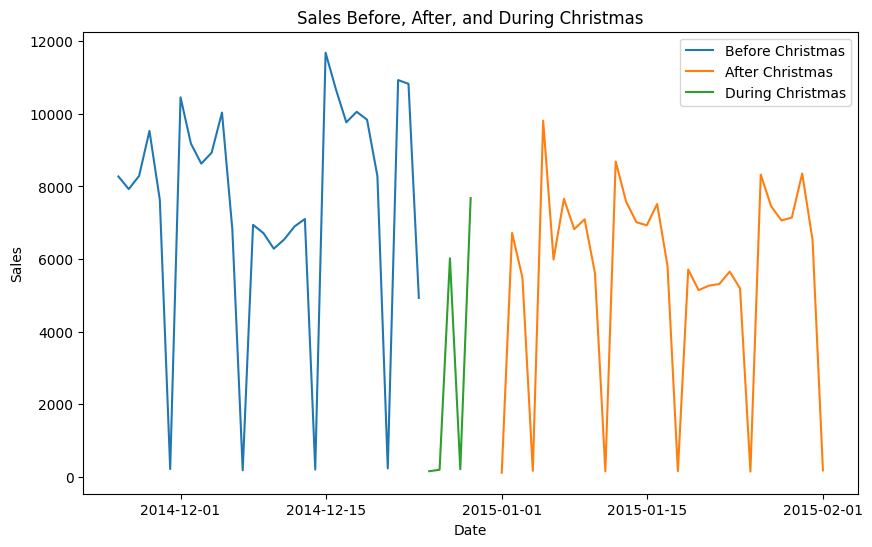

In [ ]:
before_index = (data["Date"] >= pd.to_datetime("2014-11-25")) & (data["Date"] < pd.to_datetime("2014-12-25"))
before_xmass = data[before_index].groupby("Date").agg({"Sales": "mean"})

during_index = (data["Date"] >= pd.to_datetime("2014-12-25")) & (data["Date"] < pd.to_datetime("2014-12-30"))
during_xmass = data[during_index].groupby("Date").agg({"Sales": "mean"})

after_index = (data["Date"] >= pd.to_datetime("2015-01-01")) & (data["Date"] < pd.to_datetime("2015-02-02"))
after_xmass = data[after_index].groupby("Date").agg({"Sales": "mean"})

before_data = before_xmass.reset_index()
during_data = during_xmass.reset_index()
after_data = after_xmass.reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(x="Date", y="Sales", data=before_data, label="Before Christmas")
sns.lineplot(x="Date", y="Sales", data=after_data, label="After Christmas")
sns.lineplot(x="Date", y="Sales", data=during_data, label="During Christmas")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.title("Sales Before, After, and During Christmas")
plt.legend()
plt.show()


## Key Observations:

**Before Christmas**: Sales generally increase in the weeks leading up to Christmas, reaching a peak just before the holiday.

**During Christmas**: Sales drop significantly during the Christmas period, likely due to factors such as store closures, reduced business hours, or changes in consumer spending patterns.

**After Christmas**: Sales start to recover in the weeks following Christmas, gradually returning to pre-Christmas levels. However, there may be some fluctuations during this period.

# correlation between sales and number of customers

In [ ]:
correlation = data['Sales'].corr(data['Customers'])
print(f"The correlation between sales and the number of customers is: {correlation}")




The correlation between sales and the number of customers is: 0.9217184223280563


## How does promo affect sales? Are the promos attracting more customers? does promo affect existing customers?

In [ ]:
# Group data by Promo and calculate the average sales and customers

promo_effect = data.groupby('Promo').agg({'Sales': 'mean', 'Customers': 'mean'})

# Print the results
print(promo_effect)

             Sales   Customers
Promo                         
0      4416.658753  499.628151
1      7909.216749  788.137160


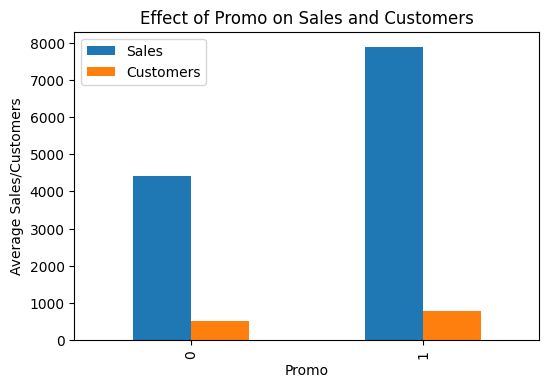

In [ ]:
# Create a bar plot to visualize the effect of Promo on Sales and Customers

promo_effect.plot(kind='bar', figsize=(6, 4))
plt.title('Effect of Promo on Sales and Customers')
plt.xlabel('Promo')
plt.ylabel('Average Sales/Customers')
plt.show()

# Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

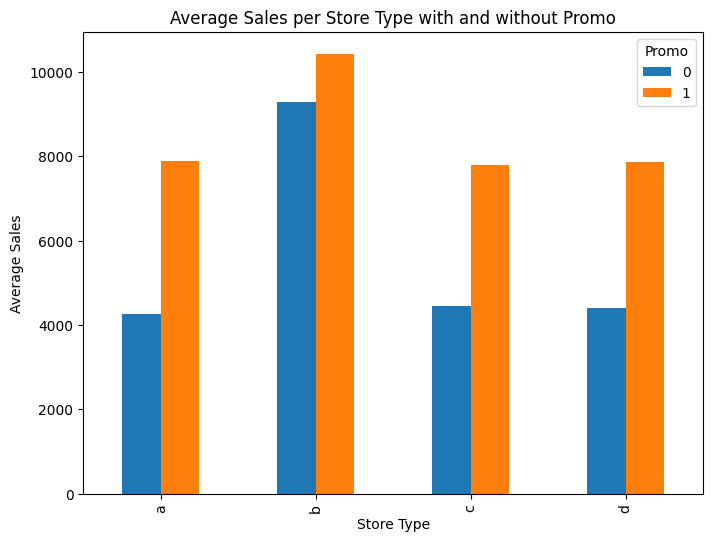

Difference in Sales between Promo and No Promo for each Store Type:
StoreType
a    3619.713062
b    1140.320355
c    3338.931431
d    3456.315323
dtype: float64


In [ ]:
# Group data by StoreType and Promo, and calculate the average sales
promo_store_sales = data.groupby(['StoreType', 'Promo'])['Sales'].mean().unstack()

# Visualize the average sales for each StoreType with and without Promo
promo_store_sales.plot(kind='bar', figsize=(8, 6))
plt.title('Average Sales per Store Type with and without Promo')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.legend(title='Promo')
plt.show()

# Analyze the difference in sales between Promo and No Promo for each StoreType
promo_store_sales_diff = promo_store_sales[1] - promo_store_sales[0]

# Print the difference in sales for each StoreType
print("Difference in Sales between Promo and No Promo for each Store Type:")
print(promo_store_sales_diff)




# Trends of customer behavior during store open and closing times

            Sales   Customers
Open                         
0        0.000000    0.000000
1     7025.981936  743.663679


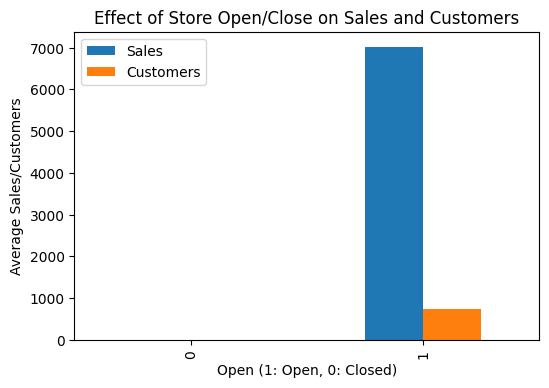

In [ ]:
# Group data by 'Open' and calculate the average sales and customers
open_close_effect = data.groupby('Open').agg({'Sales': 'mean', 'Customers': 'mean'})

# Print the results
print(open_close_effect)

# Create a bar plot to visualize the effect of store open/close on Sales and Customers
open_close_effect.plot(kind='bar', figsize=(6, 4))
plt.title('Effect of Store Open/Close on Sales and Customers')
plt.xlabel('Open (1: Open, 0: Closed)')
plt.ylabel('Average Sales/Customers')
plt.show()

                      Sales   Customers
Open DayOfWeek                         
0    1             0.000000    0.000000
     2             0.000000    0.000000
     3             0.000000    0.000000
     4             0.000000    0.000000
     5             0.000000    0.000000
     6             0.000000    0.000000
     7             0.000000    0.000000
1    1          8192.833748  829.335509
     2          7232.177256  759.607382
     3          6808.567827  723.744998
     4          6875.348259  740.347938
     5          7154.643255  762.021373
     6          5940.096612  645.906444
     7          7557.999464  993.064879


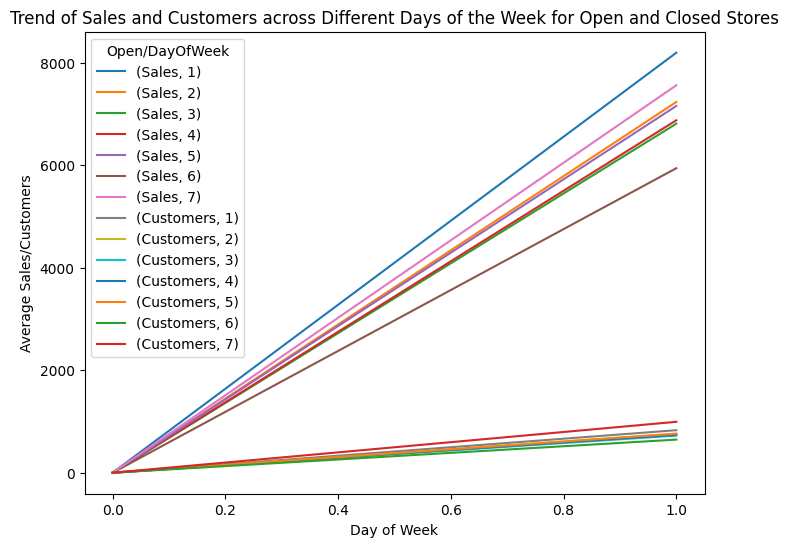

In [ ]:

# Further analysis to see the trend across different days of the week
open_close_day_effect = data.groupby(['Open', 'DayOfWeek']).agg({'Sales': 'mean', 'Customers': 'mean'})

# Print the results
print(open_close_day_effect)


# Create a line plot to visualize the trend of sales and customers across different days of the week for open and closed stores
open_close_day_effect.unstack().plot(figsize=(8, 6))
plt.title('Trend of Sales and Customers across Different Days of the Week for Open and Closed Stores')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales/Customers')
plt.legend(title='Open/DayOfWeek')
plt.show()


The chart indicates that open stores experience a significant increase in both sales and customer numbers as the week progresses.

This suggests that weekends, particularly Sunday, are the busiest days for open stores. Closed stores, on the other hand, have minimal sales and customer activity.

This highlights the importance of store operations and customer accessibility on different days of the week.

# Which stores are opened on all weekdays? How does that affect their sales on weekends?

In [ ]:
# Group data by Store and DayOfWeek, then count the number of days open
store_open_days = data.groupby(['Store', 'DayOfWeek'])['Open'].sum().unstack()

# Filter stores that are open on all weekdays (Monday to Friday)
stores_open_all_weekdays = store_open_days[(store_open_days[1] > 0) &
                                         (store_open_days[2] > 0) &
                                         (store_open_days[3] > 0) &
                                         (store_open_days[4] > 0) &
                                         (store_open_days[5] > 0)].index.tolist()

print("Stores open on all weekdays:", stores_open_all_weekdays[:10]) # Print the first 10 elements of the list using slicing

# Now, let's analyze their sales on weekends (Saturday and Sunday)
weekend_sales = data[(data['Store'].isin(stores_open_all_weekdays)) &
                    (data['DayOfWeek'].isin([6, 7]))].groupby(['Store', 'DayOfWeek'])['Sales'].mean().unstack()

print("\nAverage weekend sales for stores open on all weekdays:\n", weekend_sales.head(10))

# You can further analyze the sales data for these stores on weekends to understand the impact
# of being open on weekdays. You could compare their weekend sales to stores that are not open
# on all weekdays. You could also calculate the percentage change in sales from weekdays to
# weekends for these stores.

# Example: Calculate the average weekend sales for these stores compared to the average weekday sales
weekday_sales = data[(data['Store'].isin(stores_open_all_weekdays)) &
                    (data['DayOfWeek'].isin([1, 2, 3, 4, 5]))].groupby(['Store', 'DayOfWeek'])['Sales'].mean().unstack()

average_weekend_sales = weekend_sales.mean(axis=1)
average_weekday_sales = weekday_sales.mean(axis=1)

print("\nAverage weekday sales for stores open on all weekdays:\n")
print(average_weekday_sales.head(10)) # Calling head on average_weekday_sales

print("\nAverage weekend sales compared to weekday sales for stores open on all weekdays:\n",
      (average_weekend_sales / average_weekday_sales).head(10)) # Calling head on the result of the division

Stores open on all weekdays: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

Average weekend sales for stores open on all weekdays:
 DayOfWeek             6    7
Store                       
1           4871.373134  0.0
2           2979.044776  0.0
3           4443.313433  0.0
4          10368.388060  0.0
5           2181.447761  0.0
6           3314.522388  0.0
7           6615.895522  0.0
8           3397.522388  0.0
9           6491.358209  0.0
10          5021.059701  0.0

Average weekday sales for stores open on all weekdays:

Store
1     4412.390123
2     5234.298727
3     7068.941747
4     9386.168810
5     4985.786962
6     5096.586260
7     9308.156321
8     6267.800395
9     7011.379895
10    5698.943986
dtype: float64

Average weekend sales compared to weekday sales for stores open on all weekdays:
 Store
1     0.552011
2     0.284570
3     0.314284
4     0.552323
5     0.218767
6     0.325171
7     0.355382
8     0.271030
9     0.462916
10    0.440525
dtype: float64


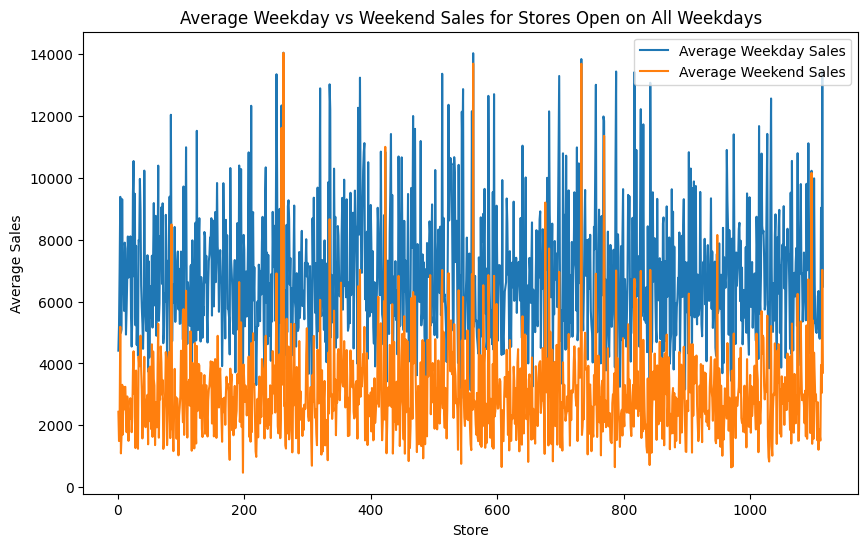

In [ ]:
# Visualize the weekend sales for these stores compared to the average weekday sales
plt.figure(figsize=(10, 6))
plt.plot(average_weekday_sales, label='Average Weekday Sales')
plt.plot(average_weekend_sales, label='Average Weekend Sales')
plt.title('Average Weekday vs Weekend Sales for Stores Open on All Weekdays')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.legend()
plt.show()

In [ ]:
# Find stores with NA CompetitionDistance initially but later have values
stores_with_changing_competition = data.groupby('Store')['CompetitionDistance'].apply(lambda x: (x.isnull().any() and x.notnull().any()))

# Filter the stores that meet the criteria
stores_with_changing_competition = stores_with_changing_competition[stores_with_changing_competition].index.tolist()


if stores_with_changing_competition:
  print("Stores with changing CompetitionDistance:")
  print(stores_with_changing_competition)

  # Analyze the sales and customers for these stores before and after the change in CompetitionDistance
  for store in stores_with_changing_competition:
    store_data = data[data['Store'] == store]

    # Find the date when CompetitionDistance started having a value (reopening of competitor)
    competition_opening_date = store_data[store_data['CompetitionDistance'].notnull()]['Date'].min()

    # Compare sales before and after this date
    before_competition = store_data[store_data['Date'] < competition_opening_date]
    after_competition = store_data[store_data['Date'] >= competition_opening_date]

    print(f"\nStore {store}:")

    # Calculate mean sales before and after competition opening
    mean_sales_before = before_competition['Sales'].mean()
    mean_sales_after = after_competition['Sales'].mean()

    print(f"Mean sales before competitor opening: {mean_sales_before}")
    print(f"Mean sales after competitor opening: {mean_sales_after}")

    # You can also compare customers
    mean_customers_before = before_competition['Customers'].mean() # Removed one level of indentation
    mean_customers_after = after_competition['Customers'].mean() # Removed one level of indentation

    print(f"Mean customers before competitor opening: {mean_customers_before}")
    print(f"Mean customers after competitor opening: {mean_customers_after}")

    # Visualize the sales trend
    plt.figure(figsize=(10, 6))
    plt.plot(before_competition['Date'], before_competition['Sales'], label='Before Competitor Opening')
    plt.plot(after_competition['Date'], after_competition['Sales'], label='After Competitor Opening')
    plt.xlabel('Date')
    plt.ylabel('Sales')
    plt.title(f'Sales trend for store {store}')
    plt.legend()
    plt.show()

else:
    print("No stores found with changing CompetitionDistance.")

No stores found with changing CompetitionDistance.


#**Conclusions of EDA**
The most selling and crowded store type is b.

The most selling and crowded assortment is b.

Sales is highly correlated to customers.

For all stores, promotion leads to increase in Sales and Customers. But promotions have low impact on store type b and assortment b when comparing to the other store types and assortments. So promotions should be applied more in the other store types and assortments.

Store type b is the most opened store type on all weekdays and has its highest sales on sundays than the other days.

Assortment a and b are the most opened assortments on all weekdays and have their highest sales on sundays than the other days.

The number of cusomers increase dramatically on sundays for assortment a while it is similar with other week days for assortment b.

Sales are increased during Chirstmas week, especially the week before. This might be due to the fact that people buy more beauty products or some common medicines for precaution during Christmas celebration.

Stores with the smallest competition distance have the highest sales. This indicates that the stores are located at city center or near hospitals.Even though having large distance between competitors is ideally considered great for sales, stores located at city centers will still get more sales regardless of competitors distance as there are more customers at city centers.

In [ ]:

data.to_csv('custumer purchasing behaviour task-1.csv', index=False)